***EXERCISE 1***


We first start by developing a method to approximate the integral part of our function, in this first section, the composite simpson method.

$$g(x) = \int_{0}^{x} \frac{1}{2\pi} e^{rac{-t^{2}}{2}}dt$$


In [1]:
import numpy as np
import math
# used for typehints in function declarations
from typing import Union, Tuple

def comp_simpson(x: Union[float, int], h:float, *,rdec = None, fun=lambda s: (1/(math.sqrt(2*3.1415926535897))*np.exp(-pow(s, 2)/2))) -> float:
  n = int(x/h)
  xvals = np.arange(0, x, h)
  # allows for a parameter to round result
  return round((h/3)*(  fun(0) + fun(x) + 2*sum(map(fun, xvals[:n - 2:2])) + 4*sum(map(fun, xvals[1: n - 1: 2]))), rdec) if rdec is not None else (h/3)*(  fun(0) + fun(x) + 2*sum(map(fun, xvals[:n - 2:2])) + 4*sum(map(fun, xvals[1: n - 1: 2])))



Now we proceed by considering some test cases to check the function works properly

In [2]:
# the assertions must work
assert comp_simpson(1, 1/1000, rdec = 3, fun = lambda s:s) == 0.498
assert comp_simpson(1, 1/10000, rdec = 3, fun = lambda s: s) == 0.5
assert comp_simpson(1, 1/1000, fun = lambda s: s**2) == 0.3313386626666667

Now we get back to coding the Newton's method for the given function

$$f(x) = \int_{0}^{x} \frac{1}{2\pi} e^{\frac{-t^{2}}{2}}dt - 0.45$$


We recall that Newton's method is given by: 

$$x_{n + 1} = x_{n} - \frac{f(x_{n})}{f'(x_{n})}$$

Since we know that integration and differentiation are inverse operations we have that: 
 $$f'(x) = \frac{1}{2\pi} e^{\frac{-x^{2}}{2}}$$



In [3]:
# f and fprime are defined as input parameters to the function so that there is no need to code another method for the following section
def newton(p0 = 0.5, *, tol = 1e-5,f=lambda x: comp_simpson(x, 1/100000) - 0.45, fprime=lambda x: 1/(math.sqrt(2*3.1415926535897))*np.exp(-pow(x, 2)/2)):
  while (abs(f(p0)) >= tol):
    p0 -= (f(p0))/(fprime(p0))
  return p0, f(p0)


res, im = newton()
print(f"{(res,im)}")

(1.64481821376159, -2.871489015288109e-06)


We find that the solution for which the root is found is: 

  $$p0 = 1.64481821376159$$

It is important to notice that for smaller values of $h$ as inputs to the composite simpson algorithms, newtons method did not converge, observing this, we stochastically reduced this value until convergence was reached.

Consequently, we code a function for the composite trapezoidal method.

In [5]:
def trapezoidal(x: Union[float, int], h: float, *, rdec=None, fun = lambda s: (1/(math.sqrt(2*3.1415926535897))*np.exp(-pow(s, 2)/2))) -> float:
  xvals = np.arange(0, x, h)
  s = 0
  for idx, val in enumerate(xvals[1:]): s += fun(val) + fun(xvals[idx - 1])
  return round((h/2)*s, rdec) if rdec is not None else (h/2)*s

We proceed by including some test cases to check that the function works properly, which we find that it does

In [6]:
assert trapezoidal(1, 1/100, fun = lambda s: s) == 0.4901
assert trapezoidal(1, 1/1000, rdec = 2, fun = lambda s: s**3) == 0.25

Now we proceed to test the newtons method when the approximation of the integral part of the function is given by the trapezoidal rule instead of  simpson's rule

In [7]:
res, im = newton(f = lambda x: trapezoidal(x, 1/100000) - 0.45)
print(f"{res,im}")

(1.6448169811111442, -4.499664908619305e-06)


***EXERCISE 2***



We want to compute the value of the following integral, without explicitly using numerical integration schemes such as simpson's or trapezoidal

$$f(x) = \int_{0}^{x} \sqrt{1 + t^3} dt$$

Where  $0 \leq x \leq 5.$

We must perform some action to get an initial value problem from this integral in order to be able to approximate it through ODE solving methods, i.e, a problem of the form 
  $$ y'(t) = g(t,y)$$
  $$y(x_0) = y_0$$

Since we know that without being given an initial condition, solving the integral will result in a family of solutions, we are going to assume that the initial condition for this case is 
$$y(0) = 1$$

We will have that after solving the IVP, 
$$y(x_i) = \int_{0}^{x_i} \sqrt{1 + t^3}dt$$


We code both versions of Euler's method

In [8]:
def e_euler(y0:Union[float, int], h,*, upper=5, f=lambda t: math.sqrt(1 + t**3)) -> Tuple[np.ndarray, np.ndarray]:
  xvals = np.arange(0, upper, h)
  y = np.zeros(len(xvals))
  y[0] = y0
  for idx, value in enumerate(xvals[1:]):
    y[idx + 1] = y[idx] + h*f(xvals[idx])
  return xvals, y
  

def i_euler(y0: Union[float, int], h: float,*, upper=5, f = lambda t: math.sqrt(1 + t**3)) -> Tuple[np.ndarray, np.ndarray]:
  xvals = np.arange(0, upper, h)
  y = np.zeros(len(xvals))
  y[0] = y0
  for idx, value in enumerate(xvals[1:]):
    # f is a function just of t and not of y, so there's is no need to approximate y[idx + 1] with explicit euler to use it as input for 
    # the actual implicit approximation of y[idx + 1] given by implicit euler, this is called a predictor-corrector approach.
    y[idx + 1] = y[idx] + h*f(xvals[idx + 1])
  return xvals, y

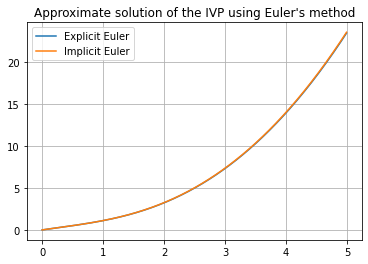

In [9]:
import matplotlib.pyplot as plt


x,y = e_euler(0, 1/100)
# since they  are both called for the same value of h and the same upper, the returned x array will be the same, so we ignore the second one
_, y2 = i_euler(0, 1/100)
plt.plot(x,y)
plt.plot(x, y2)
plt.grid()
plt.legend(['Explicit Euler', 'Implicit Euler'])
plt.title("Approximate solution of the IVP using Euler's method")
plt.show()

Graphically we see no noticeable difference between the two methods for that particular value of h. Now we proceed to compare the difference in the results of both of the methods for different values of h, by seeing what's the point of maximum divergence between the two of them.

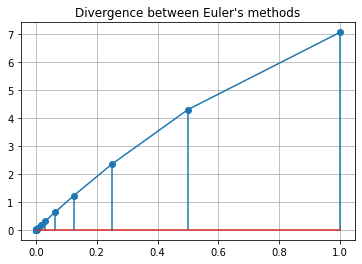

In [10]:
# vector where errors are stored
div = []
hs = [1/pow(2,i) for i in range(20)]
for h in hs:
  _,y = e_euler(0, h)
  _, y2 = i_euler(0, h)
  div.append(max((abs(y[idx] - val) for idx,val in enumerate(y2))))

plt.stem(hs, div, use_line_collection=True)
plt.plot(hs, div)
plt.grid()
plt.title("Divergence between Euler's methods")
plt.show()

In [11]:
print(min(div), min(hs))

1.950257451710513e-05 1.9073486328125e-06
